In [18]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [19]:
Iris=pd.read_csv('11_Iris.csv')
Iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
135,136,7.7,3.0,6.1,2.3,Iris-virginica
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
0,1,5.1,3.5,1.4,0.2,Iris-setosa
129,130,7.2,3.0,5.8,1.6,Iris-virginica
31,32,5.4,3.4,1.5,0.4,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [97]:
Iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- no missing values found

In [94]:
Iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [21]:
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder() 
Iris['Species']= label_encoder.fit_transform(Iris['Species'])
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [22]:
Iris1=Iris.drop('Id',axis=1)
Iris1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


 - no values in range -0.1 to 0.1 with target variable.

In [98]:
Iris1.loc[:, (Iris1.corr()['Species'] <= -0.1) | (Iris1.corr()['Species'] >= 0.1)].head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [23]:
Iris1.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64

- no values observed less than 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

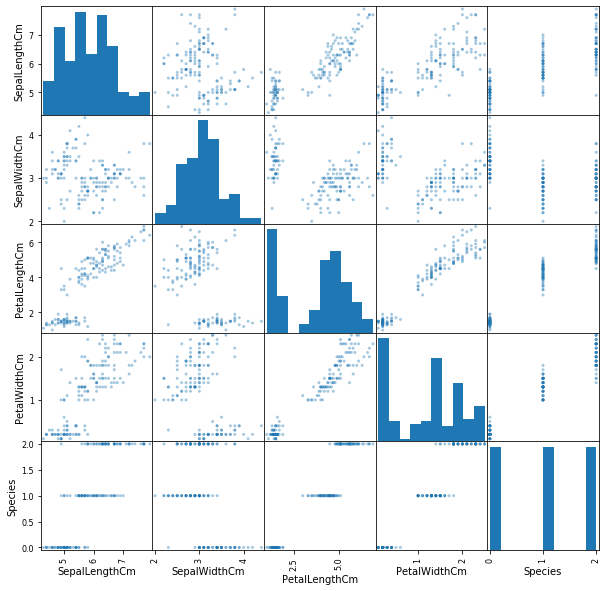

In [143]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(Iris1, alpha=0.4,figsize=(10,10))
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import StandardScaler
y=Iris1['Species']
X = Iris1.drop('Species',axis=1)
sc=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [132]:
from sklearn.metrics import accuracy_score

for k in [3, 5, 9]:
  model = KNeighborsClassifier(n_neighbors = k)    
  sc.fit(X_train)
  scaledX_train = sc.transform(X_train)
  scaledX_test = sc.transform(X_test)
  model.fit(scaledX_train, y_train)                      
  y_pred = model.predict(scaledX_test)                   
  print('test accuracy',accuracy_score(y_test, y_pred))
  print('train accuracy',model.score(scaledX_train, y_train))

test accuracy 0.9
train accuracy 0.9583333333333334
test accuracy 0.9
train accuracy 0.9666666666666667
test accuracy 0.9333333333333333
train accuracy 0.975


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [138]:
from sklearn.metrics import accuracy_score
M_error = []
k_value = []
MSE_k = []
y = Iris1['Species']
X = Iris1.drop('Species',axis=1)
sc=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

for n in range (1,20,2):
    model=KNeighborsClassifier(n_neighbors=n)
    sc.fit(X_train)
    scaledX_train = sc.transform(X_train)
    scaledX_test = sc.transform(X_test)
    model.fit(scaledX_train,y_train)
    predicted_X_test=model.predict(scaledX_test)
    test_acc=accuracy_score(predicted_X_test,y_test)
    MSE = 1-test_acc
    M_error.append(MSE)
    k_value.append(n)
    MSE_k.append((MSE,n))
    
print ('value of k',k_value,'MSE is',M_error)

value of k [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] MSE is [0.09999999999999998, 0.09999999999999998, 0.09999999999999998, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665, 0.06666666666666665]


In [141]:
print("The lowest MSE and optimal number of neighbors is {}".format(min(MSE_k)))

The lowest MSE and optimal number of neighbors is (0.06666666666666665, 7)


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

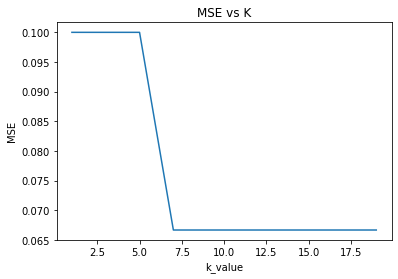

In [142]:
%matplotlib inline
plt.title('MSE vs K')
plt.plot(k_value,M_error)
plt.xlabel('k_value')
plt.ylabel('MSE')
plt.show()

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [73]:
y=Iris1['Species']
X = Iris1.drop('Species',axis=1)

In [74]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

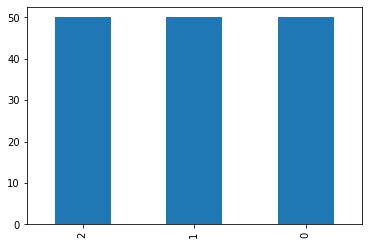

In [75]:
Iris['Species'].value_counts().plot(kind='bar')

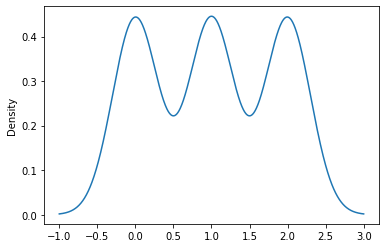

In [146]:
Iris1['Species'].plot(kind='kde')

In [76]:
Iris1=Iris.drop('Id',axis=1) #Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [77]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [78]:
Iris1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


1. correlation between target & features is high specially with petal length & petal width
2. petal length & petal width are correlated with each other & also correlated with sepal length so need to remove one feature out of them.

### Split data in Training and test set in 80:20.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=4)

### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

### Question 14 
Train and Fit NaiveBayes Model

In [84]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(scaledX_train, y_train) #Fit the model

GaussianNB(priors=None, var_smoothing=1e-09)

In [147]:
predicted_X_test = model.predict(scaledX_test)  #Predict
model.score(scaledX_train, y_train)  

0.9666666666666667

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [92]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predicted_X_test))       # show Confusion Matrix

[[16  0  0]
 [ 0  5  0]
 [ 0  1  8]]


In [88]:
accuracy_score(predicted_X_test,y_test)# show accuracy

0.9666666666666667

In [91]:
print(metrics.classification_report(y_test,predicted_X_test )) #Show precision and Recall metrics

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.83      1.00      0.91         5
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.94      0.96      0.95        30
weighted avg       0.97      0.97      0.97        30



1. As per confusion matrix for two classes non-diagonal elements are zero, so they are correctly classified.
2. In 3rd row of confusion matrix one class predicted wrong, which is missclassified. 
3. because of the model missclassified for class 2, reacall value for class 2 is low 0.89.
4. and may be missclassification happen for class 1 so precion value is low for class 1.

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779